**VOLET 1: Les flux migratoires**

In [ ]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import excel file1:
from google.colab import files
uploaded = files.upload()

Saving Demandes d'asile, publication du 26 juin 2025.xlsx to Demandes d'asile, publication du 26 juin 2025.xlsx


In [ ]:
# CORRECTION ERREUR:
import pandas as pd
from google.colab import files

# 1) Upload du fichier depuis ton ordinateur
uploaded = files.upload()

# 2) Récupérer automatiquement le nom du fichier choisi
file_name = list(uploaded.keys())[0]
print("Nom du fichier chargé :", file_name)

# 3) Lire le fichier Excel
df_asile = pd.read_excel(file_name)

# 4) Afficher les 10 premières lignes pour vérifier
df_asile.head(10)


Saving Demandes d'asile, publication du 26 juin 2025.xlsx to Demandes d'asile, publication du 26 juin 2025 (1).xlsx
Nom du fichier chargé : Demandes d'asile, publication du 26 juin 2025 (1).xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2024/\n2023
1,NaN,En GUDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Premières demandes formulées en GUDA (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126671.0,138420.0,81531.0,104381.0,136724.0,145160.0,129909.0,"- 10,5 %"
3,dont : procédure normale ou accélérée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92329.0,103137.0,64114.0,84343.0,107278.0,108309.0,109837.0,"+ 1,4 %"
4,procédure Dublin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34302.0,35283.0,17417.0,20038.0,29446.0,36851.0,20072.0,"- 45,5 %"
5,Rééxamens en GUDA (B),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11178.0,12863.0,11733.0,16987.0,19049.0,21896.0,27643.0,"+ 26,2 %"
6,Total des demandes formulées en GUDA (A)+(B),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137849.0,151283.0,93264.0,121368.0,155773.0,167056.0,157552.0,"- 5,7 %"
7,NaN,Hors GUDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Autres demandes formulées et Réinstallations (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24791.0,26539.0,22233.0,13003.0,12783.0,20141.0,12404.0,"- 38,4 %"
9,NaN,À l'OFPRA et à la CNDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extraire les années (ligne 0):

# On extrait les années à partir de la ligne 0
# On commence à la colonne 2 pour sauter les NaN et le "En GUDA"
annees_brut = df_asile.iloc[0, 2:17]  # colonnes 2 à 16

print("Années brutes :")
print(annees_brut)


Années brutes :
0
NaN              NaN
NaN              NaN
NaN              NaN
NaN              NaN
NaN              NaN
NaN              NaN
NaN              NaN
34302.0     137849.0
35283.0     151283.0
17417.0      93264.0
20038.0     121368.0
29446.0     155773.0
36851.0     167056.0
20072.0     157552.0
- 45,5 %     - 5,7 %
Name: 0, dtype: object


In [ ]:
# Relire et isoler directement les années et les valeurs correctes

import pandas as pd
from google.colab import files

# 1) Recharger ton fichier proprement
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Lecture du fichier en ignorant les 2 premières lignes (jusqu’à la ligne des années)
df_asile = pd.read_excel(file_name, skiprows=2, header=None)

# 3) Afficher un aperçu des 10 premières lignes
print("Aperçu du tableau relu correctement :")
print(df_asile.head(10))


Saving Demandes d'asile, publication du 26 juin 2025.xlsx to Demandes d'asile, publication du 26 juin 2025 (2).xlsx
Aperçu du tableau relu correctement :
                                                  0                       1   \
0                                                NaN                 En GUDA   
1           Premières demandes formulées en GUDA (A)                     NaN   
2              dont : procédure normale ou accélérée                     NaN   
3                                   procédure Dublin                     NaN   
4                              Rééxamens en GUDA (B)                     NaN   
5       Total des demandes formulées en GUDA (A)+(B)                     NaN   
6                                                NaN               Hors GUDA   
7  Autres demandes formulées et Réinstallations (C)                      NaN   
8                                                NaN  À l'OFPRA et à la CNDA   
9            Demandes d’asile enregistrées à l

In [ ]:
# EXTRAIRE DIRECTEMENT LES VALEURS UTILES

# On extrait directement les valeurs de la ligne 1, colonnes 8 à 14 (inclus)
valeurs_brut = df_asile.iloc[1, 8:15]

print("Valeurs brutes extraites (demande d'asile) :")
print(valeurs_brut)


Valeurs brutes extraites (demande d'asile) :
8          NaN
9     126671.0
10    138420.0
11     81531.0
12    104381.0
13    136724.0
14    145160.0
Name: 1, dtype: object


In [ ]:
# CONSTRUIRE UN DATAFRAME ANNEE/ DEMANDES

# Liste des années correspondantes (2018 → 2024)
annees = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Construire un DataFrame propre
asile_clean = pd.DataFrame({
    "Année": annees,
    "Demandes": valeurs_brut.values
})

# S'assurer que Demandes est bien numérique
asile_clean["Demandes"] = pd.to_numeric(asile_clean["Demandes"], errors="coerce")

print("Tableau final propre :")
print(asile_clean)


Tableau final propre :
   Année  Demandes
0   2018       NaN
1   2019  126671.0
2   2020  138420.0
3   2021   81531.0
4   2022  104381.0
5   2023  136724.0
6   2024  145160.0


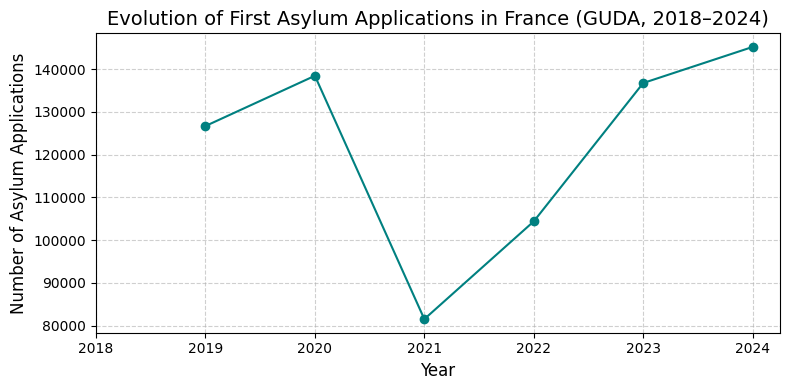

In [ ]:
# STEP DATA VISUALISATION - TRACER LA COURBE

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(asile_clean["Année"], asile_clean["Demandes"], marker="o", color="teal")

# English titles and labels
plt.title("Evolution of First Asylum Applications in France (GUDA, 2018–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Asylum Applications", fontsize=12)

# Grid and style
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(asile_clean["Année"])
plt.tight_layout()

# Show the plot
plt.show()



**VOLET 2: Le contrôle migratoire (les sorties)**

In [ ]:
# STEP 1: IMPORTER ET AFFICHER UN APERCU DU FICHIER:

import pandas as pd
from google.colab import files

# 1) Upload the file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("File loaded:", file_name)

# 2) Read the Excel file
df_irreguliere = pd.read_excel(file_name)

# 3) Display first rows
df_irreguliere.head(10)


Saving Lutte contre l'immigration irrégulière au 26 juin 2025.xlsx to Lutte contre l'immigration irrégulière au 26 juin 2025.xlsx
File loaded: Lutte contre l'immigration irrégulière au 26 juin 2025.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Éloignements et départs exécutés des étrangers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mouvements,Origine des étrangers,Destination,2014.0,2015.0,2016.0,2017.0,2018,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2024/\n2023
3,Éloignements forcés (A),Pays tiers,Pays tiers,5675.0,6311.0,6166.0,6596.0,7105,8858.0,3329.0,3511.0,5056.0,5729.0,6507.0,0.1358
4,NaN,NaN,"Union Européenne (Réadmissions Schengen, trans...",6154.0,5742.0,3711.0,4896.0,5615,7092.0,3879.0,4638.0,4419.0,4061.0,4242.0,0.04457
5,NaN,Union Européenne,NaN,3332.0,3432.0,3084.0,2772.0,2957,2956.0,1903.0,1942.0,1935.0,1932.0,2107.0,0.09058
6,NaN,Total éloignements forcés (A),NaN,15161.0,15485.0,12961.0,14270.0,15677,18906.0,9111.0,10091.0,11410.0,11722.0,12856.0,0.096741
7,Éloignements aidés (B),Total éloignements aidés (B),NaN,1547.0,1118.0,841.0,1078.0,2070,2752.0,1658.0,1570.0,2102.0,2832.0,4586.0,0.61935
8,Éloignements spontanés (C),Pays tiers,NaN,4060.0,2791.0,2150.0,1861.0,1878,1750.0,1259.0,1537.0,1674.0,2316.0,3934.0,0.698618
9,NaN,Union Européenne,NaN,721.0,597.0,537.0,358.0,332,338.0,356.0,205.0,214.0,178.0,225.0,0.264045


In [ ]:
# STEP 2: Extraire la bonne ligne et construire le tableau

# On extrait les valeurs de la ligne "Total éloignements forcés (A)" (index = 6)
valeurs_irreg = df_irreguliere.iloc[6, 3:14]  # colonnes 3 à 13 = années 2014–2024

print("Valeurs extraites :")
print(valeurs_irreg)


Valeurs extraites :
Unnamed: 3     15161.0
Unnamed: 4     15485.0
Unnamed: 5     12961.0
Unnamed: 6     14270.0
Unnamed: 7       15677
Unnamed: 8     18906.0
Unnamed: 9      9111.0
Unnamed: 10    10091.0
Unnamed: 11    11410.0
Unnamed: 12    11722.0
Unnamed: 13    12856.0
Name: 6, dtype: object


In [ ]:
# STEP 3: Construire le tableau propre (Dataframe):

# Liste des années correspondant aux valeurs extraites
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Créer le DataFrame propre
irreg_clean = pd.DataFrame({
    "Year": years,
    "Forced_Removals": pd.to_numeric(valeurs_irreg.values, errors="coerce")
})

print("Clean table:")
print(irreg_clean)


Clean table:
    Year  Forced_Removals
0   2014          15161.0
1   2015          15485.0
2   2016          12961.0
3   2017          14270.0
4   2018          15677.0
5   2019          18906.0
6   2020           9111.0
7   2021          10091.0
8   2022          11410.0
9   2023          11722.0
10  2024          12856.0


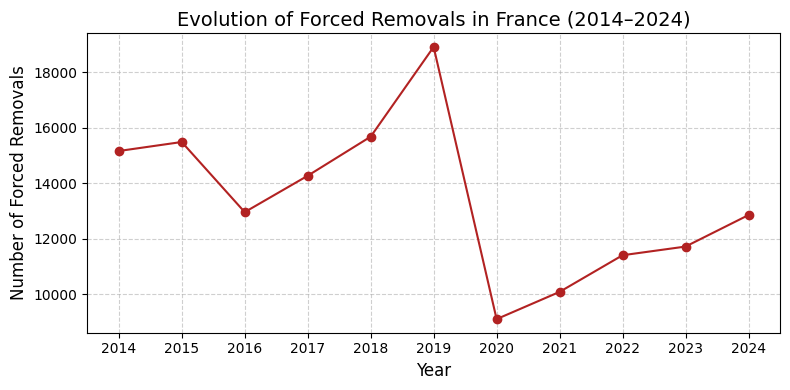

In [ ]:
# STEP 4: Tracer la courbe

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(irreg_clean["Year"], irreg_clean["Forced_Removals"], marker="o", color="firebrick")

plt.title("Evolution of Forced Removals in France (2014–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Forced Removals", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(irreg_clean["Year"])
plt.tight_layout()
plt.show()


**VOLET 3: Répartition territoriale des immigrés (départements)**

In [ ]:
# STEP 1: Import file3 et vérifier sa structure

import pandas as pd
from google.colab import files

# 1) Upload the file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("File loaded:", file_name)

# 2) Read Excel file
df_depart = pd.read_excel(file_name)

# 3) Display first 10 rows
df_depart.head(10)


Saving EM_DEPARTEMENTS_2021.xlsx to EM_DEPARTEMENTS_2021.xlsx
File loaded: EM_DEPARTEMENTS_2021.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Part de la population immigrée dans les départ...,NaN,NaN
1,Champ : France entière,NaN,NaN
2,"Source : Insee, recensement de la population 2...",NaN,NaN
3,NaN,NaN,NaN
4,Département,Code,Pourcentage immigrés
5,Ain,01,12.062011
6,Aisne,02,4.947978
7,Allier,03,5.376628
8,Alpes-de-Haute-Provence,04,8.379048
9,Hautes-Alpes,05,5.822421


In [ ]:
# STEP 2: Nettoyer et créer le tableau propre

# Lire le fichier en ignorant les 5 premières lignes inutiles
df_depart = pd.read_excel(file_name, skiprows=5)

# Renommer les colonnes pour les rendre plus claires en anglais
df_depart.columns = ["Department", "Code", "Immigrant_Percentage"]

# Supprimer les éventuelles lignes vides
df_depart = df_depart.dropna(subset=["Department", "Immigrant_Percentage"])

# Convertir les pourcentages en float si nécessaire
df_depart["Immigrant_Percentage"] = pd.to_numeric(df_depart["Immigrant_Percentage"], errors="coerce")

# Vérifier le résultat
print("Clean table:")
print(df_depart.head(10))


Clean table:
                Department Code  Immigrant_Percentage
0                      Ain   01             12.062011
1                    Aisne   02              4.947978
2                   Allier   03              5.376628
3  Alpes-de-Haute-Provence   04              8.379048
4             Hautes-Alpes   05              5.822421
5          Alpes-Maritimes   06             15.061708
6                  Ardèche   07              5.482315
7                 Ardennes   08              5.923727
8                   Ariège   09              8.328372
9                     Aube   10              8.355668


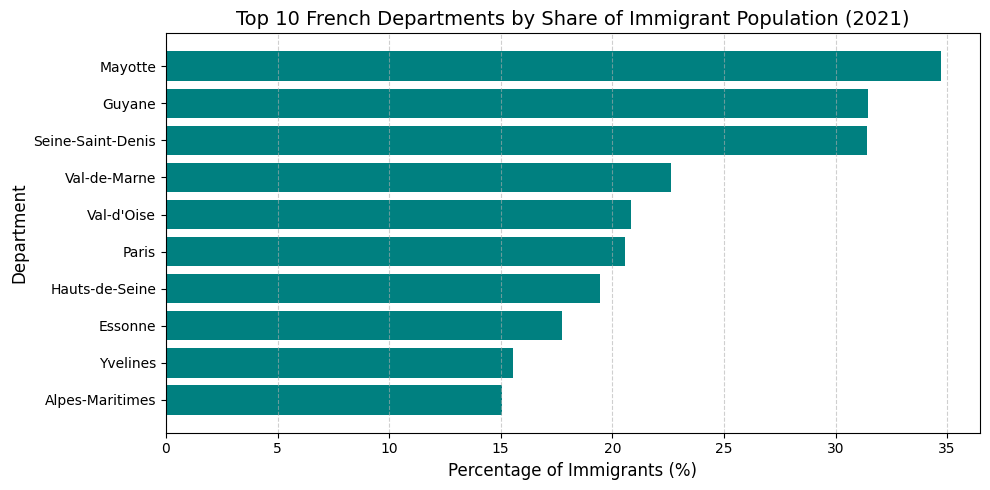

In [ ]:
# STEP 3: Data vizualisation des départements avec le plus d'immigrés

import matplotlib.pyplot as plt

# Sélectionner les 10 départements avec la plus forte proportion d’immigrés
top10 = df_depart.sort_values(by="Immigrant_Percentage", ascending=False).head(10)

# Tracer le graphique
plt.figure(figsize=(10,5))
plt.barh(top10["Department"], top10["Immigrant_Percentage"], color="teal")
plt.gca().invert_yaxis()  # pour que le plus élevé soit en haut

plt.title("Top 10 French Departments by Share of Immigrant Population (2021)", fontsize=14)
plt.xlabel("Percentage of Immigrants (%)", fontsize=12)
plt.ylabel("Department", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**VOLET 4: Composition de la population immigréé par origine**

In [ ]:
# STEP 1: Import et afficher File4

import pandas as pd
from google.colab import files

# Upload du fichier
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("File loaded:", file_name)

# Lire le fichier Excel
df_pop = pd.read_excel(file_name)

# Afficher les 10 premières lignes
df_pop.head(10)


Saving EM_POPULATION_2021.xlsx to EM_POPULATION_2021.xlsx
File loaded: EM_POPULATION_2021.xlsx


,Effectifs des immigrés par pays de naissance et des étrangers par nationalité,Unnamed: 1,Unnamed: 2
0,Origine ou nationalité,Immigrés Effectifs,Étrangers Effectifs
1,"Portugal, Italie, Espagne",1104000,746000
2,Autres pays de l'UE,608000,440000
3,Autres pays d'Europe,521000,386000
4,Total Europe,2233000,1572000
5,"Algérie, Maroc, Tunisie",2025000,1156000
6,Autres pays d'Afrique,1281000,835000
7,Total Afrique,3306000,1991000
8,Turquie,240000,168000
9,Autres pays d'Asie,733000,439000


In [ ]:
# STEP 2: Nettoyer et préparer le tableau

# Garder uniquement les 3 colonnes importantes
df_pop = df_pop.iloc[1:, 0:3]  # on saute la première ligne vide
df_pop.columns = ["Origin", "Immigrants", "Foreigners"]

# Supprimer les lignes qui contiennent des totaux
df_pop = df_pop[~df_pop["Origin"].str.contains("Total", na=False)]

# Convertir les valeurs en numérique
df_pop["Immigrants"] = pd.to_numeric(df_pop["Immigrants"], errors="coerce")
df_pop["Foreigners"] = pd.to_numeric(df_pop["Foreigners"], errors="coerce")

# Supprimer les lignes vides
df_pop = df_pop.dropna(subset=["Immigrants"])

# Vérifier le résultat
print("Clean table:")
print(df_pop)


Clean table:
                      Origin  Immigrants  Foreigners
1  Portugal, Italie, Espagne   1104000.0    746000.0
2       Autres pays de l'UE     608000.0    440000.0
3       Autres pays d'Europe    521000.0    386000.0
5    Algérie, Maroc, Tunisie   2025000.0   1156000.0
6      Autres pays d'Afrique   1281000.0    835000.0
8                    Turquie    240000.0    168000.0
9         Autres pays d'Asie    733000.0    439000.0


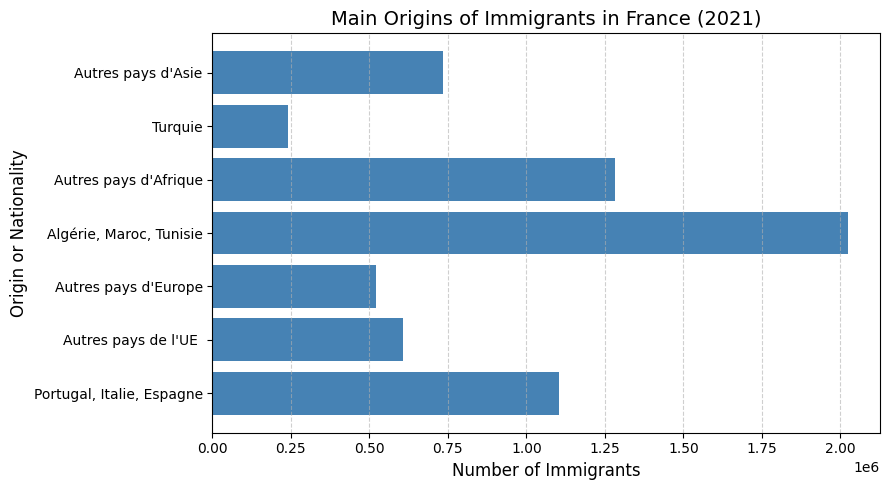

In [ ]:
# STEP 3: Visualiser la répartition par origine

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.barh(df_pop["Origin"], df_pop["Immigrants"], color="steelblue")

plt.title("Main Origins of Immigrants in France (2021)", fontsize=14)
plt.xlabel("Number of Immigrants", fontsize=12)
plt.ylabel("Origin or Nationality", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# STEP 4: Visualisation sous forme de tableau pour avoir les chiffres

import pandas as pd

# Recréons ton tableau à partir des données nettoyées
data = {
    "Origin": [
        "Portugal, Italy, Spain",
        "Other EU countries",
        "Other European countries",
        "Algeria, Morocco, Tunisia",
        "Other African countries",
        "Turkey",
        "Other Asian countries"
    ],
    "Immigrants": [1104000, 608000, 521000, 2025000, 1281000, 240000, 733000],
    "Foreigners": [746000, 440000, 386000, 1156000, 835000, 168000, 439000]
}

df_table = pd.DataFrame(data)

# Ajouter des séparateurs de milliers pour la lisibilité
df_table["Immigrants"] = df_table["Immigrants"].apply(lambda x: f"{x:,}".replace(",", " "))
df_table["Foreigners"] = df_table["Foreigners"].apply(lambda x: f"{x:,}".replace(",", " "))

# Afficher le tableau joliment avec Pandas Styler
styled = (
    df_table.style
    .hide(axis="index")
    .set_caption("Main Origins of Immigrants in France (2021)")
    .set_table_styles(
        [
            {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold"), ("text-align", "center"), ("margin-bottom", "10px")]},
            {"selector": "th", "props": [("background-color", "#1f77b4"), ("color", "white"), ("font-weight", "bold"), ("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center"), ("padding", "8px")]}
        ]
    )
)

styled


Origin,Immigrants,Foreigners
"Portugal, Italy, Spain",1 104 000,746 000
Other EU countries,608 000,440 000
Other European countries,521 000,386 000
"Algeria, Morocco, Tunisia",2 025 000,1 156 000
Other African countries,1 281 000,835 000
Turkey,240 000,168 000
Other Asian countries,733 000,439 000


**VOLET 5 - Analyse de la contribution des immigrés au marché du travail**

In [ ]:
# STEP 1 : Importer et explorer le dataset

import pandas as pd
from google.colab import files

# 1) Importer le fichier
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Charger le fichier Excel
df = pd.read_excel(file_name)

# 3) Afficher les 10 premières lignes pour comprendre la structure
df.head(10)


Saving IMMFRA23-F22.xlsx to IMMFRA23-F22.xlsx


,Figure 1 - Taux d'activité selon le sexe et l'âge en 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en %
1,NaN,Femmes,NaN,NaN,NaN,Hommes,NaN,NaN,NaN,Ensemble,NaN,NaN,NaN
2,NaN,15-24 ans,25-49 ans,50-64 ans,Ensemble,15-24 ans,25-49 ans,50-64 ans,Ensemble,15-24 ans,25-49 ans,50-64 ans,Ensemble
3,Immigrés,32,66,62,62,43,89,74,80,38,76,68,70
4,Descendants d'immigrés,31,79,68,64,33,90,72,70,32,85,70,67
5,Ni immigrés ni descendants d'immigrés,39,88,67,72,43,93,72,76,41,91,69,74
6,Ensemble,38,84,67,70,42,92,72,76,40,88,69,73
7,"Lecture : en 2021, 32 % des femmes immigrées d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Champ : France hors Mayotte, personnes âgées d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Source : Insee, enquête Emploi 2021.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# STEP 2: Extraire et reformater les données

# Renommer les colonnes principales
df.columns = ["Population", "Femmes_15_24", "Femmes_25_49", "Femmes_50_64", "Femmes_Ensemble",
              "Hommes_15_24", "Hommes_25_49", "Hommes_50_64", "Hommes_Ensemble",
              "Tous_15_24", "Tous_25_49", "Tous_50_64", "Tous_Ensemble"]

# Garder seulement la colonne globale "Tous_Ensemble"
df_clean = df[["Population", "Tous_Ensemble"]]

# Convertir en float
df_clean["Tous_Ensemble"] = pd.to_numeric(df_clean["Tous_Ensemble"], errors="coerce")

print("Taux d'activité (ensemble, 2021):")
print(df_clean)

Taux d'activité (ensemble, 2021):
                                          Population  Tous_Ensemble
0                                                NaN            NaN
1                                                NaN            NaN
2                                                NaN            NaN
3                                           Immigrés           70.0
4                             Descendants d'immigrés           67.0
5              Ni immigrés ni descendants d'immigrés           74.0
6                                           Ensemble           73.0
7  Lecture : en 2021, 32 % des femmes immigrées d...            NaN
8  Champ : France hors Mayotte, personnes âgées d...            NaN
9               Source : Insee, enquête Emploi 2021.            NaN


/tmp/ipython-input-2139403739.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Tous_Ensemble"] = pd.to_numeric(df_clean["Tous_Ensemble"], errors="coerce")


In [ ]:
# Supprimer les lignes sans valeur numérique dans 'Tous_Ensemble'
df_clean = df_clean.dropna(subset=["Tous_Ensemble"])

# S'assurer que les valeurs sont bien numériques
df_clean["Tous_Ensemble"] = pd.to_numeric(df_clean["Tous_Ensemble"], errors="coerce")

# Réinitialiser les index (pour éviter les erreurs de position)
df_clean = df_clean.reset_index(drop=True)

print(df_clean)


                              Population  Tous_Ensemble
0                               Immigrés           70.0
1                 Descendants d'immigrés           67.0
2  Ni immigrés ni descendants d'immigrés           74.0
3                               Ensemble           73.0


Cleaned data:
                       Group  Activity_Rate
0                 Immigrants             70
1  Descendants of immigrants             67
2             Non-immigrants             74
3           Total population             73


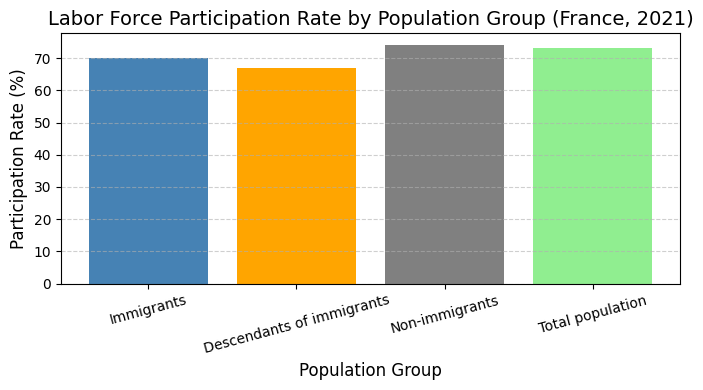

In [ ]:
# STEP 3: Visualiser les données

import pandas as pd
import matplotlib.pyplot as plt

# 1) Reload the table cleanly from your Excel file (start fresh)
df = pd.read_excel("IMMFRA23-F22.xlsx", skiprows=3, nrows=4)

# 2) Rename the columns explicitly
df.columns = ["Population", "Females_15_24", "Females_25_49", "Females_50_64", "Females_Total",
              "Males_15_24", "Males_25_49", "Males_50_64", "Males_Total",
              "All_15_24", "All_25_49", "All_50_64", "All_Total"]

# 3) Keep only the overall column
df_clean = df[["Population", "All_Total"]].copy()

# 4) Convert to numeric and drop empty rows
df_clean["All_Total"] = pd.to_numeric(df_clean["All_Total"], errors="coerce")
df_clean = df_clean.dropna(subset=["All_Total"]).reset_index(drop=True)

# 5) Translate column and group names
df_clean = df_clean.rename(columns={"Population": "Group", "All_Total": "Activity_Rate"})

mapping = {
    "Immigrés": "Immigrants",
    "Descendants d'immigrés": "Descendants of immigrants",
    "Ni immigrés ni descendants d'immigrés": "Non-immigrants",
    "Ensemble": "Total population"
}
df_clean["Group"] = df_clean["Group"].replace(mapping)

# 6) Display the cleaned DataFrame
print("Cleaned data:")
print(df_clean)

# 7) Plot the English chart
plt.figure(figsize=(7,4))
plt.bar(df_clean["Group"], df_clean["Activity_Rate"],
        color=["steelblue", "orange", "gray", "lightgreen"])

plt.title("Labor Force Participation Rate by Population Group (France, 2021)", fontsize=14)
plt.ylabel("Participation Rate (%)", fontsize=12)
plt.xlabel("Population Group", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
